# SVM Soft Margin

Nipun Batra  
2023-04-25

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/svm-soft-margin.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
# retina
%config InlineBackend.figure_format = 'retina'

In [32]:
from sklearn.datasets import make_blobs

In [33]:
X, y = make_blobs(centers=2, n_samples=100, random_state=0, cluster_std=1.5)

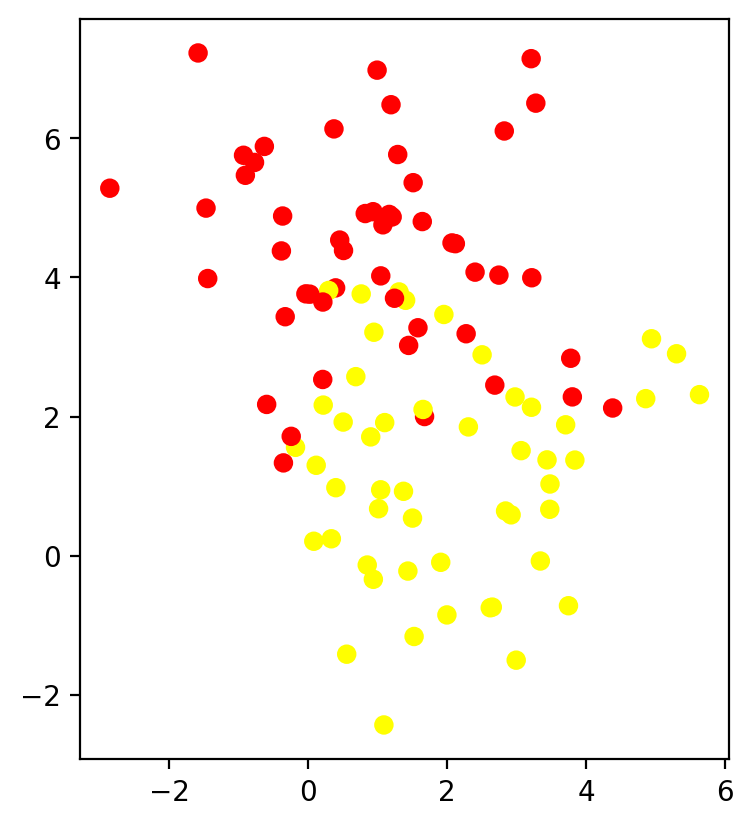

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.autumn)
plt.gca().set_aspect('equal')

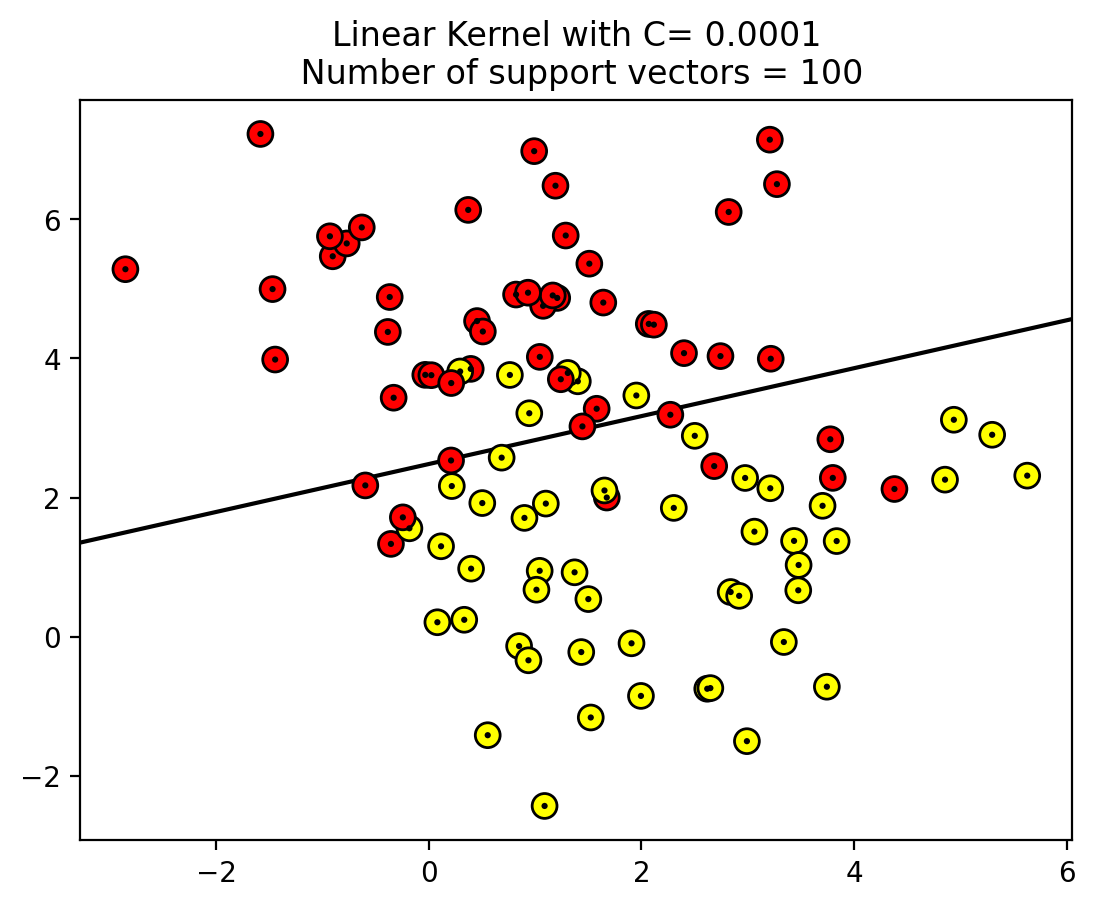

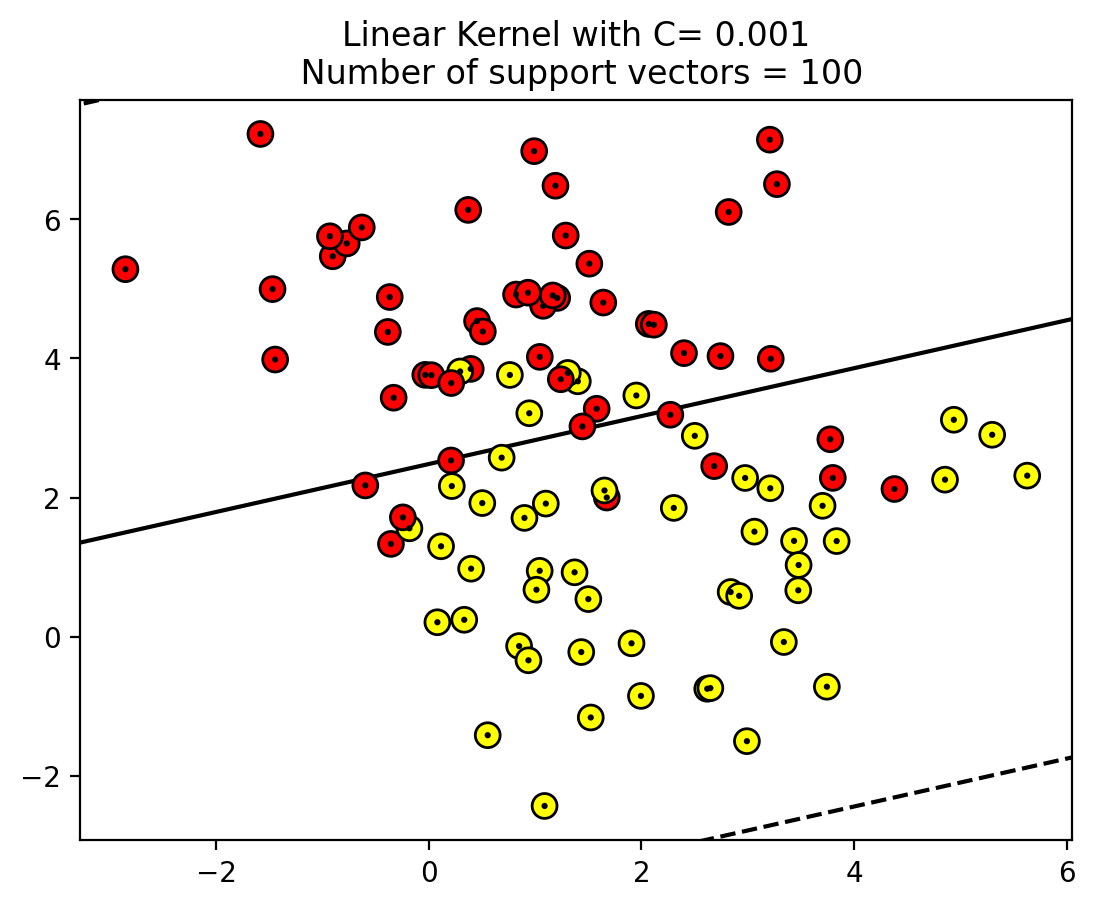

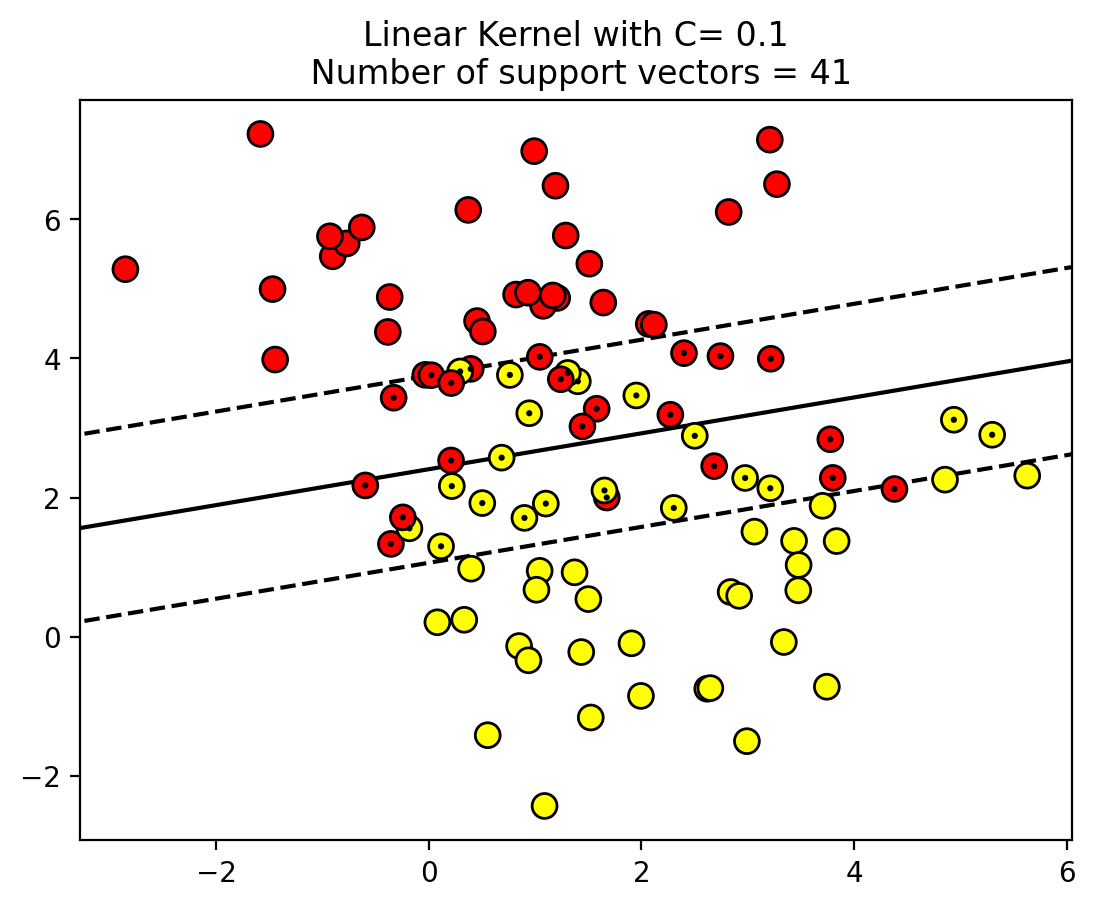

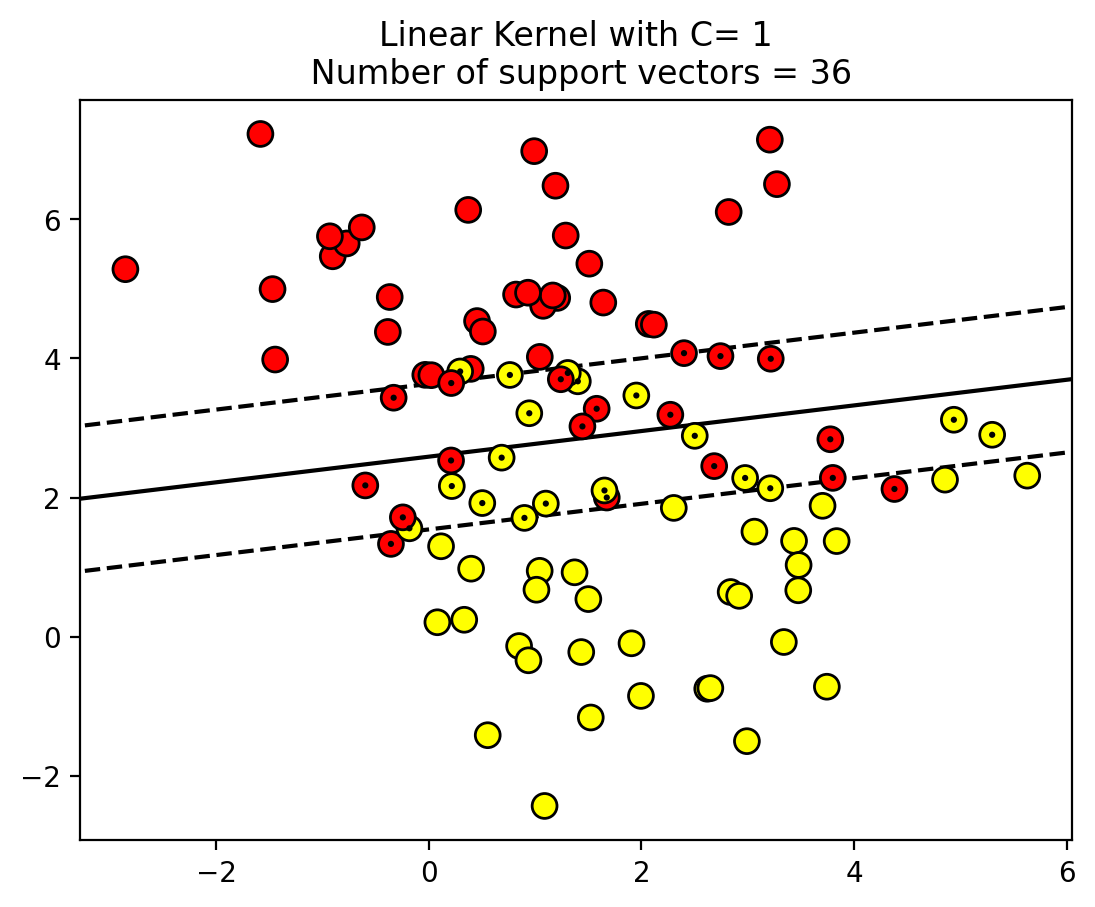

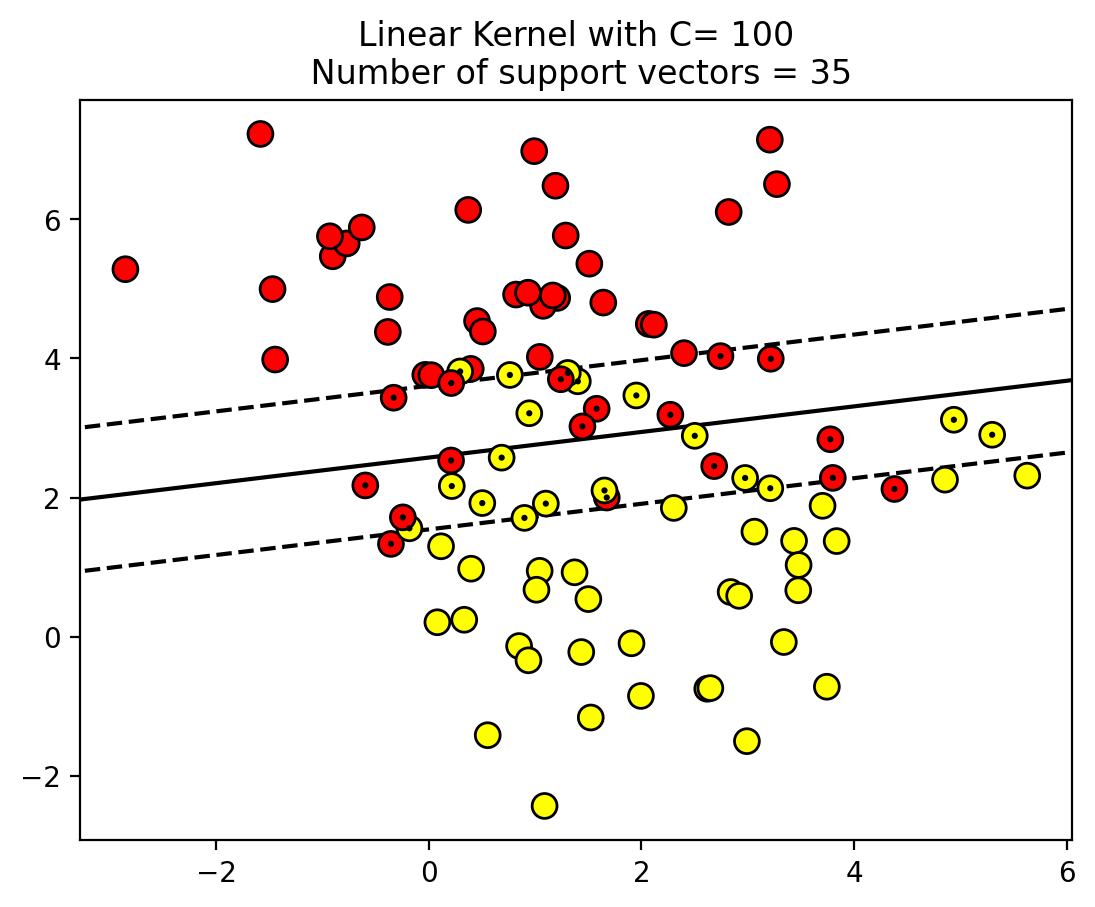

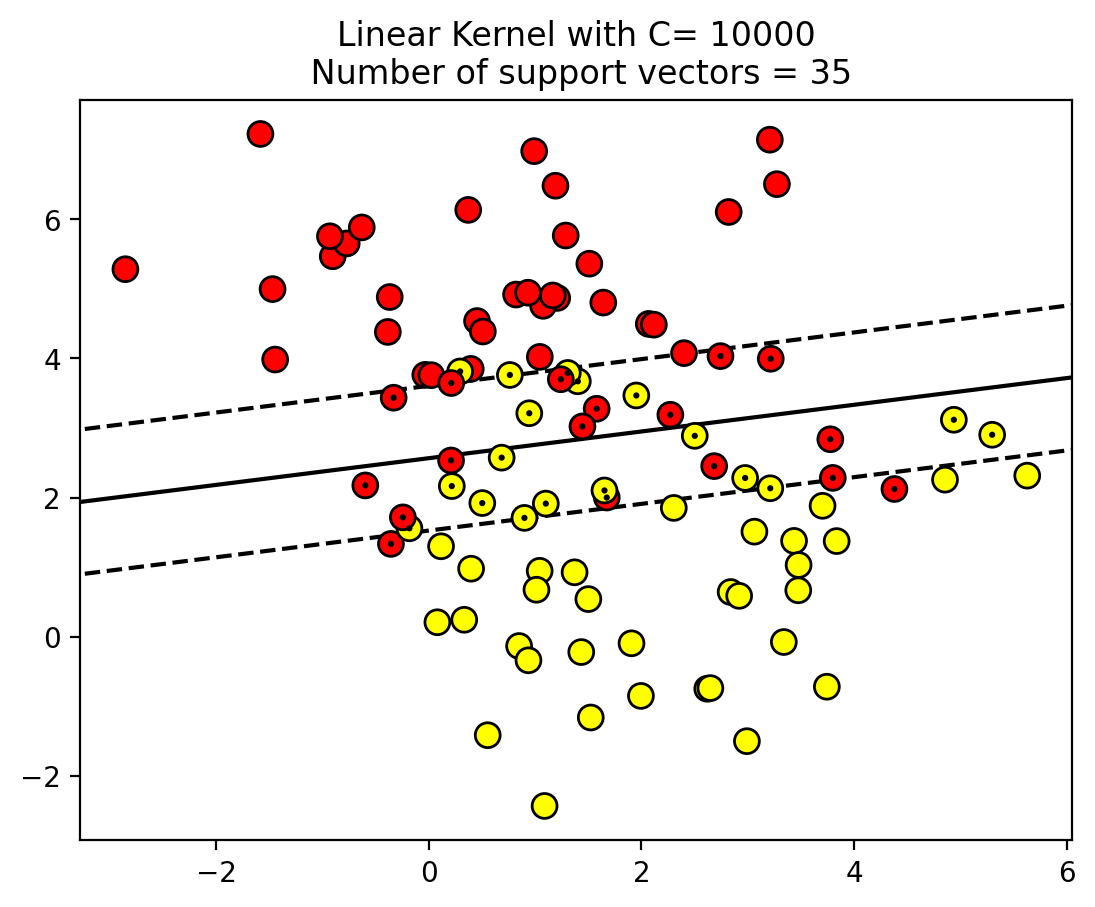

In [35]:
from sklearn import svm
X_train = X
y_train = y
kernel = 'linear'
for fig_num, C in enumerate([0.0001, 0.001, 0.1, 1, 100, 10000][:]):
    clf = svm.SVC(kernel=kernel,C = C )
    clf.fit(X, y)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.autumn,
                edgecolor='k',s=80)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
   
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.autumn, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    plt.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=5, lw=0.001, facecolors='none',zorder=10,c='k', edgecolors='none');


    plt.title("Linear Kernel with C= {}\n Number of support vectors = {}".format(C, len(clf.support_vectors_)))


In [36]:
### from scratch implementation in Torch

In [55]:
import torch.nn as nn
import torch
import torch.optim as optim

class OurSVM(nn.Module):
    def __init__(self, C = 1.0):
        super(OurSVM, self).__init__()
        self.C = C
                
    def forward(self, x):
        return torch.matmul(x, self.w) + self.b

    def hinge_loss(self, y_pred, y_true):
        return torch.mean(torch.max(torch.zeros_like(y_pred), 1 - y_true * y_pred)) + (torch.sum(self.w**2)) / (2 * self.C)

    def fit(self, X, y, epochs=100, lr=3e-4):
        self.w = nn.Parameter(torch.randn(X.shape[1], 1, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))
        optimizer = optim.Adam(self.parameters(), lr=lr)
        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.forward(X)
            loss = self.hinge_loss(y_pred, y)
            print(f'Epoch {epoch}, Loss: {loss.item()}')
            loss.backward()
            optimizer.step()

In [56]:
our_svm = OurSVM(C=1.0)
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)
y_train[y_train == 0] = -1
our_svm.fit(X_train, y_train, epochs=4500, lr=3e-3)

Epoch 0, Loss: 0.5445287227630615
Epoch 1, Loss: 0.5369461178779602
Epoch 2, Loss: 0.5294452905654907
Epoch 3, Loss: 0.522026538848877
Epoch 4, Loss: 0.5146908164024353
Epoch 5, Loss: 0.5074390769004822
Epoch 6, Loss: 0.500271201133728
Epoch 7, Loss: 0.4932182729244232
Epoch 8, Loss: 0.48647040128707886
Epoch 9, Loss: 0.4799497723579407
Epoch 10, Loss: 0.4739691913127899
Epoch 11, Loss: 0.4684266448020935
Epoch 12, Loss: 0.4629947245121002
Epoch 13, Loss: 0.45766204595565796
Epoch 14, Loss: 0.45248934626579285
Epoch 15, Loss: 0.44752809405326843
Epoch 16, Loss: 0.44265472888946533
Epoch 17, Loss: 0.4378686845302582
Epoch 18, Loss: 0.4333285689353943
Epoch 19, Loss: 0.4288690388202667
Epoch 20, Loss: 0.4244857132434845
Epoch 21, Loss: 0.42017486691474915
Epoch 22, Loss: 0.4159332513809204
Epoch 23, Loss: 0.41175782680511475
Epoch 24, Loss: 0.40772339701652527
Epoch 25, Loss: 0.40381550788879395
Epoch 26, Loss: 0.4001219868659973
Epoch 27, Loss: 0.3968224823474884
Epoch 28, Loss: 0.39376

In [57]:
our_svm.w, our_svm.b

(Parameter containing:
 tensor([[ 0.1670],
         [-0.4376]], requires_grad=True),
 Parameter containing:
 tensor([0.9858], requires_grad=True))

In [58]:
sklearn_svm = svm.SVC(kernel='linear', C=1)
sklearn_svm.fit(X, y)
sklearn_svm.coef_, sklearn_svm.intercept_

(array([[ 0.1761835 , -0.95555852]]), array([2.47220356]))